In [1]:
# Import necessary packages
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets

In [2]:
digits  = datasets.load_digits()

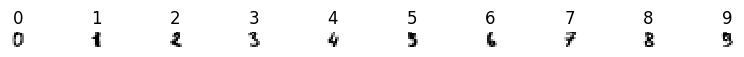

In [3]:
fig, axes = plt.subplots(1, 10, figsize=(10, 0.2))

for ax, img, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(img, cmap="gray_r", interpolation="nearest")
    ax.set_title(label)

In [4]:
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold)
from sklearn.metrics import (f1_score,
                             ConfusionMatrixDisplay,
                             classification_report)

# Neural network
from sklearn.neural_network import MLPClassifier

In [11]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [12]:
digits.images.reshape((len(digits.images), -1)).shape

(1797, 64)

In [ ]:
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

X_train_cv, X_test, y_train_cv, y_test = train_test_split(X,
                                                          y,
                                                          test_size=0.2, # 20 % da base
                                                          random_state=42,
                                                          stratify=y)


In [ ]:

def train(X, y, model_klass, **kwargs):
    cv = StratifiedKFold(n_splits=5)
    f1_score_val_list = []
    f1_score_train_list = []
    model_list =[]
    scaler_list = []
    # Validação cruzada só em Training Data
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train = X[train_idx, :]
        y_train = y[train_idx]
        X_val = X[val_idx, :]
        y_val = y[val_idx]

        # Escala
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        scaler_list.append(scaler)

        # Treino
        model = model_klass(**kwargs)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_train_scaled)

        y_pred_val = model.predict(X_val_scaled)
        print(f"========================= FOLD {fold} ==========================")
        print(f"Meu resultado para treino de F1-Score é {f1_score(y_train, y_pred, average='macro'):.2}")
        print(f"Meu resultado para validação de F1-Score é {f1_score(y_val, y_pred_val, average='macro'):.2}") 
        f1_score_val_list.append(f1_score(y_val, y_pred_val, average='macro'))
        f1_score_train_list.append(f1_score(y_train, y_pred, average='macro'))
        model_list.append(model)
    print()
    print()
    mean_val = np.mean(f1_score_val_list)
    std_val = np.std(f1_score_val_list)
    print(f"Meu resultado de F1-Score Médio de treino é {np.mean(f1_score_train_list): .2} +- {np.std(f1_score_train_list): .2} ")
    print(f"Meu resultado de F1-Score Médio de validação é {mean_val: .2} +- {std_val: .2} ")
    print()

    best_model_idx = np.argmax(f1_score_val_list)
    print(f"Meu melhor fold é: {best_model_idx} ")
    best_model = model_list[best_model_idx]

    return best_model, mean_val, std_val, scaler_list[best_model_idx]

In [ ]:
results =[]
for neurons in range(1, 30):
    model, mean_val, std_val, scaler = train(X_train_cv, y_train_cv,
                                             MLPClassifier,
                                             hidden_layer_sizes=(neurons,),
                                             max_iter=10000,
                                             activation="logistic",
                                             alpha=1e-5,
                                             tol=1e-3,
                                             learning_rate_init=.3,
                                             solver='sgd')
            
    results.append((model, scaler, mean_val, std_val))

results = pd.DataFrame(results, columns = ["model", 'scaler',"mean f1", "std f1"])

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 0.31
Meu resultado para validação de F1-Score é 0.25
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.25
Meu resultado para validação de F1-Score é 0.21
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 0.28
Meu resultado para validação de F1-Score é 0.23
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 0.28
Meu resultado para validação de F1-Score é 0.27
========================= FOLD 4 ==========================
Meu resultado para treino de F1-Score é 0.3
Meu resultado para validação de F1-Score é 0.26


Meu resultado de F1-Score Médio de treino é  0.28 +-  0.021 
Meu resultado de F1-Score Médio de validação é  0.24 +-  0.021 

Meu melhor fold é: 3 
========================= FOLD 0 ==========================
Meu resultado para treino 

In [ ]:
results

,model,scaler,mean f1,std f1
0,"MLPClassifier(activation='logistic', alpha=1e-...",StandardScaler(),0.243063,0.021420
1,"MLPClassifier(activation='logistic', alpha=1e-...",StandardScaler(),0.608866,0.075607
2,"MLPClassifier(activation='logistic', alpha=1e-...",StandardScaler(),0.790051,0.041648
3,"MLPClassifier(activation='logistic', alpha=1e-...",StandardScaler(),0.864520,0.016573
4,"MLPClassifier(activation='logistic', alpha=1e-...",StandardScaler(),0.881517,0.017475
5,"MLPClassifier(activation='logistic', alpha=1e-...",StandardScaler(),0.916207,0.010723
6,"MLPClassifier(activation='logistic', alpha=1e-...",StandardScaler(),0.937112,0.008283
7,"MLPClassifier(activation='logistic', alpha=1e-...",StandardScaler(),0.948155,0.004099
8,"MLPClassifier(activation='logistic', alpha=1e-...",StandardScaler(),0.946592,0.008877
9,"MLPClassifier(activation='logistic', alpha=1e-...",StandardScaler(),0.959967,0.009348


Text(0.5, 0, 'N Neurons')

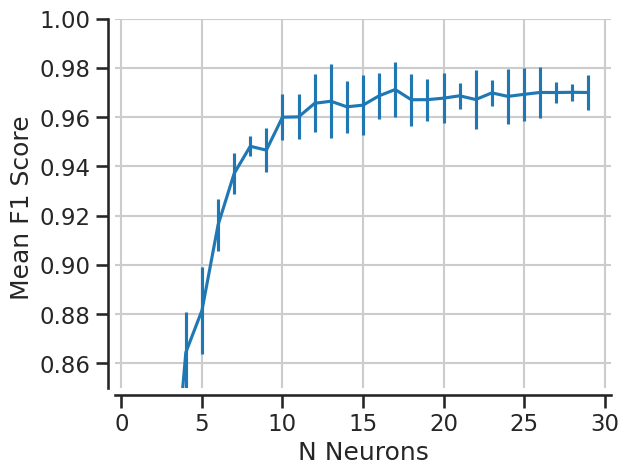

In [ ]:
sns.set_style("ticks")
sns.set_context("talk")
plt.errorbar(range(1, 30), results["mean f1"], results["std f1"])
plt.grid(True)
sns.despine(offset=5)
plt.ylim([ 0.85, 1])
plt.ylabel("Mean F1 Score ")
plt.xlabel("N Neurons")

Confusion matrix:
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 34  1  0  0  0  0  0  1  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  0]
 [ 0  0  0  0 35  0  1  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  1  0  0 35  0  0]
 [ 0  3  1  0  0  0  0  0 31  0]
 [ 0  0  0  0  1  0  0  0  0 35]]


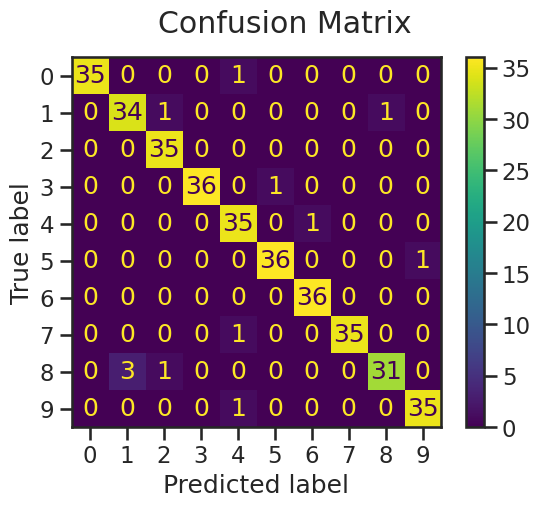

In [ ]:
n_neurons = 17

X_test_scaled = results.scaler[n_neurons - 1].transform(X_test)

disp = ConfusionMatrixDisplay.from_predictions(y_test, results.model[n_neurons - 1].predict(X_test_scaled))
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")


In [ ]:
print(classification_report(y_test, results.model[n_neurons - 1].predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      0.94      0.93        36
           2       0.95      1.00      0.97        35
           3       1.00      0.97      0.99        37
           4       0.92      0.97      0.95        36
           5       0.97      0.97      0.97        37
           6       0.97      1.00      0.99        36
           7       1.00      0.97      0.99        36
           8       0.97      0.89      0.93        35
           9       0.97      0.97      0.97        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [ ]:
from sklearn.linear_model import LogisticRegression

logit, logit_mean_val, logit_std_val, logit_scaler = train(X_train_cv, y_train_cv, LogisticRegression, solver='newton-cg')

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.98
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.97
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.98
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.97
========================= FOLD 4 ==========================
Meu resultado para treino de F1-Score é 1.0
Meu resultado para validação de F1-Score é 0.95


Meu resultado de F1-Score Médio de treino é  1.0 +-  0.0007 
Meu resultado de F1-Score Médio de validação é  0.97 +-  0.012 

Meu melhor fold é: 0 


In [ ]:
X_test_scaled = logit_scaler.transform(X_test)

print(classification_report(y_test, logit.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.91      0.86      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.95      0.97      0.96        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        36
           8       0.89      0.91      0.90        35
           9       0.95      0.97      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [ ]:
pd.DataFrame(logit.predict_proba(X_test_scaled))

,0,1,2,3,4,5,6,7,8,9
0,1.945077e-04,6.029466e-08,3.027371e-07,6.837047e-05,3.556890e-05,9.223826e-01,1.077140e-04,1.061259e-06,0.000742,7.646824e-02
1,2.589607e-06,2.628099e-05,9.954357e-01,1.243901e-03,1.526606e-06,2.218474e-03,1.916032e-04,6.763872e-08,0.000880,1.309102e-07
2,4.157596e-04,5.654268e-02,2.791900e-04,1.638228e-03,2.923864e-03,1.381973e-04,2.538764e-03,5.053278e-03,0.923299,7.171452e-03
3,2.097032e-03,2.282265e-01,2.204958e-03,1.910604e-06,3.799681e-03,6.225784e-03,1.516289e-01,1.147089e-02,0.593923,4.212864e-04
4,4.629907e-07,7.427164e-06,1.392703e-04,3.355400e-03,1.498027e-04,5.156035e-04,2.403886e-06,9.956637e-01,0.000137,2.858361e-05
...,...,...,...,...,...,...,...,...,...,...
355,1.383962e-03,5.305777e-04,6.499036e-08,7.394893e-10,9.961188e-01,4.094378e-06,1.179491e-03,2.051880e-04,0.000577,3.637248e-07
356,7.769803e-08,3.655776e-06,9.997466e-01,2.189317e-04,1.757054e-09,1.743097e-05,3.241994e-07,2.641316e-07,0.000012,4.972278e-07
357,9.994656e-01,7.759596e-10,2.930619e-06,9.661535e-08,2.537523e-04,7.078680e-05,7.315929e-06,4.726317e-05,0.000017,1.357191e-04
358,7.973068e-07,5.878909e-05,8.331984e-04,9.976421e-01,2.396347e-09,3.185031e-05,1.158729e-07,5.168299e-06,0.000372,1.056400e-03
